In [1]:
# ============================================================
# 0. Imports
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ============================================================
# 1. Chargement des deux fichiers
# ============================================================

# Adapter les chemins si besoin
mat = pd.read_csv("student-mat.csv", sep=";")
por = pd.read_csv("student-por.csv", sep=";")

# Ajout d'une colonne pour identifier la matière
mat["dataset"] = "math"
por["dataset"] = "portuguese"

# Concaténation pour certaines analyses globales
data = pd.concat([mat, por], ignore_index=True)

print("Taille student-mat :", mat.shape)
print("Taille student-por :", por.shape)


Taille student-mat : (395, 34)
Taille student-por : (649, 34)


In [2]:
# ============================================================
# 2. Comparaison des schémas (colonnes et types)
# ============================================================

print("\n=== Colonnes dans student-mat ===")
print(sorted(mat.columns))

print("\n=== Colonnes dans student-por ===")
print(sorted(por.columns))

# Colonnes présentes dans l'un mais pas l'autre
cols_mat = set(mat.columns)
cols_por = set(por.columns)

print("\nColonnes uniquement dans student-mat :", cols_mat - cols_por)
print("Colonnes uniquement dans student-por :", cols_por - cols_mat)

# Comparaison des types
print("\n=== Types d'étudiants MAT ===")
print(mat.dtypes)

print("\n=== Types d'étudiants POR ===")
print(por.dtypes)



=== Colonnes dans student-mat ===
['Dalc', 'Fedu', 'Fjob', 'G1', 'G2', 'G3', 'Medu', 'Mjob', 'Pstatus', 'Walc', 'absences', 'activities', 'address', 'age', 'dataset', 'failures', 'famrel', 'famsize', 'famsup', 'freetime', 'goout', 'guardian', 'health', 'higher', 'internet', 'nursery', 'paid', 'reason', 'romantic', 'school', 'schoolsup', 'sex', 'studytime', 'traveltime']

=== Colonnes dans student-por ===
['Dalc', 'Fedu', 'Fjob', 'G1', 'G2', 'G3', 'Medu', 'Mjob', 'Pstatus', 'Walc', 'absences', 'activities', 'address', 'age', 'dataset', 'failures', 'famrel', 'famsize', 'famsup', 'freetime', 'goout', 'guardian', 'health', 'higher', 'internet', 'nursery', 'paid', 'reason', 'romantic', 'school', 'schoolsup', 'sex', 'studytime', 'traveltime']

Colonnes uniquement dans student-mat : set()
Colonnes uniquement dans student-por : set()

=== Types d'étudiants MAT ===
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu

In [3]:
# ============================================================
# 3. Statistiques descriptives comparées
# ============================================================

variables_numeriques = ["age", "absences", "G1", "G2", "G3"]

summary = data.groupby("dataset")[variables_numeriques].agg(["mean", "std", "min", "max"])
summary


age                    absences                    \
                 mean       std min max      mean       std min max   
dataset                                                               
math        16.696203  1.276043  15  22  5.708861  8.003096   0  75   
portuguese  16.744222  1.218138  15  22  3.659476  4.640759   0  32   

                   G1                           G2                    \
                 mean       std min max       mean       std min max   
dataset                                                                
math        10.908861  3.319195   3  19  10.713924  3.761505   0  19   
portuguese  11.399076  2.745265   0  19  11.570108  2.913639   0  19   

                   G3                    
                 mean       std min max  
dataset                                  
math        10.415190  4.581443   0  20  
portuguese  11.906009  3.230656   0  19

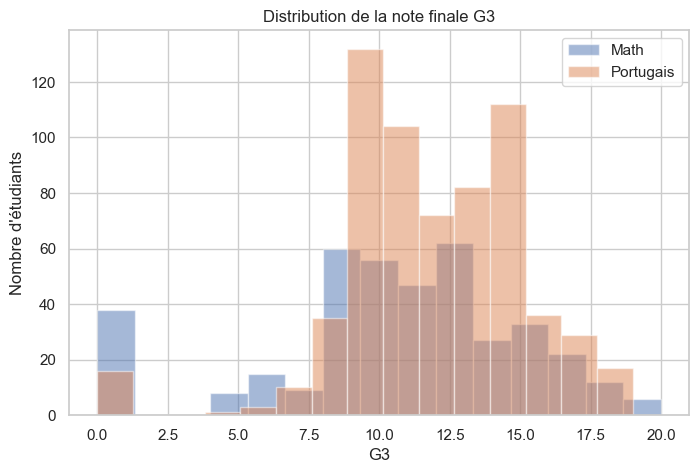

In [ ]:
# ============================================================
# 4. Comparaison graphique des distributions
# ============================================================
#4.1. Histogramme comparé de la note finale G3
plt.figure(figsize=(8, 5))
plt.hist(mat["G3"], bins=15, alpha=0.5, label="Math")
plt.hist(por["G3"], bins=15, alpha=0.5, label="Portugais")
plt.title("Distribution de la note finale G3")
plt.xlabel("G3")
plt.ylabel("Nombre d'étudiants")
plt.legend()
plt.show()


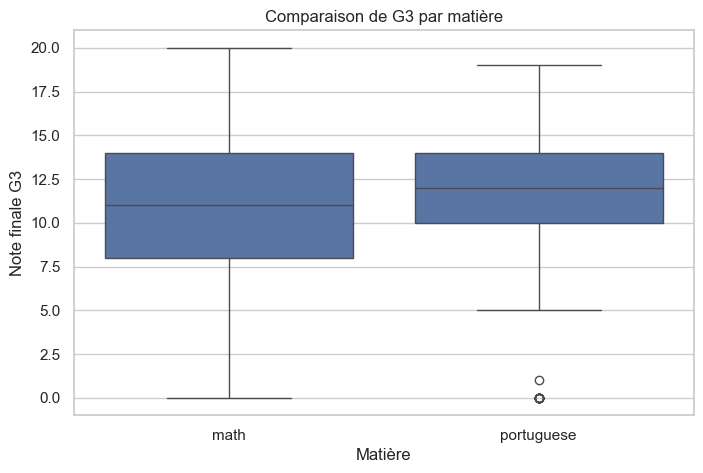

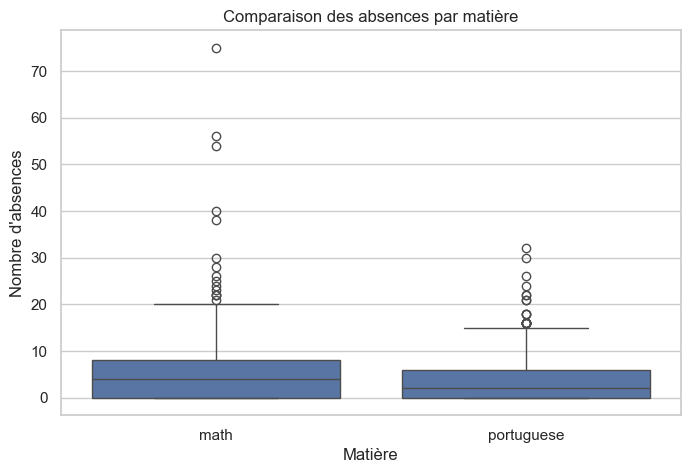

In [6]:
#4.2. Boxplots par matière
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="dataset", y="G3")
plt.title("Comparaison de G3 par matière")
plt.xlabel("Matière")
plt.ylabel("Note finale G3")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="dataset", y="absences")
plt.title("Comparaison des absences par matière")
plt.xlabel("Matière")
plt.ylabel("Nombre d'absences")
plt.show()


Taux de réussite dans Math : 67.09%
Taux de réussite dans Portugais : 84.59%

Taux de réussite par dataset :
dataset
math          0.670886
portuguese    0.845917
Name: passed, dtype: float64


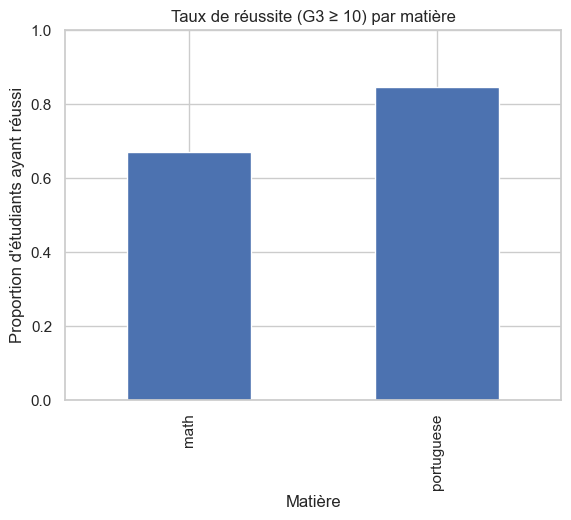

In [7]:
# ============================================================
# 5. Comparaison des taux de réussite (succès / échec)
# ============================================================

# On définit "réussite" = G3 >= 10
for df, name in [(mat, "Math"), (por, "Portugais")]:
    df["passed"] = (df["G3"] >= 10).astype(int)
    success_rate = df["passed"].mean()
    print(f"Taux de réussite dans {name} : {success_rate:.2%}")

# Taux de réussite global par matière
success_by_dataset = data.assign(
    passed=(data["G3"] >= 10).astype(int)
).groupby("dataset")["passed"].mean()

print("\nTaux de réussite par dataset :")
print(success_by_dataset)

success_by_dataset.plot(kind="bar")
plt.title("Taux de réussite (G3 ≥ 10) par matière")
plt.ylabel("Proportion d'étudiants ayant réussi")
plt.xlabel("Matière")
plt.ylim(0, 1)
plt.show()



=== Répartition (%) de sex par matière ===
dataset       math  portuguese
sex                           
F        52.658228   59.013867
M        47.341772   40.986133


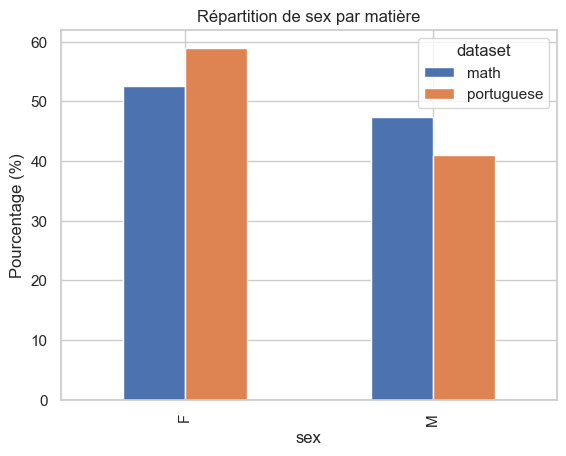


=== Répartition (%) de higher par matière ===
dataset       math  portuguese
higher                        
no        5.063291   10.631741
yes      94.936709   89.368259


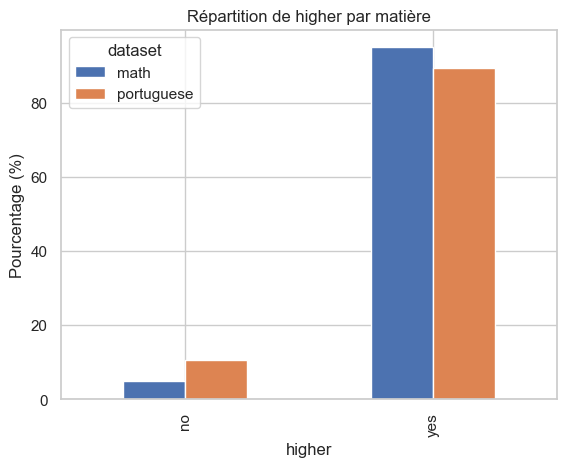


=== Répartition (%) de internet par matière ===
dataset        math  portuguese
internet                       
no        16.708861   23.266564
yes       83.291139   76.733436


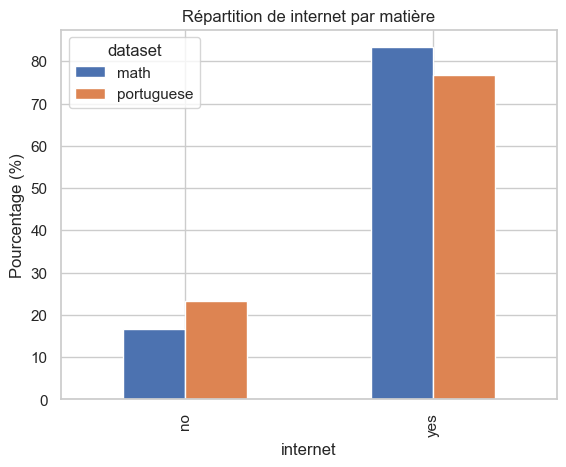


=== Répartition (%) de activities par matière ===
dataset          math  portuguese
activities                       
no          49.113924    51.46379
yes         50.886076    48.53621


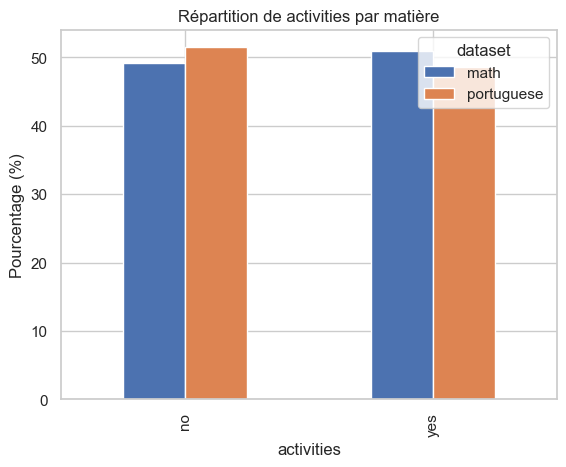


=== Répartition (%) de schoolsup par matière ===
dataset         math  portuguese
schoolsup                       
no         87.088608   89.522342
yes        12.911392   10.477658


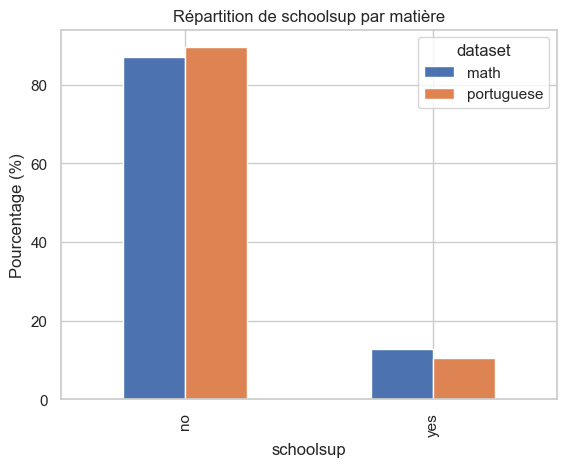


=== Répartition (%) de famsup par matière ===
dataset       math  portuguese
famsup                        
no       38.734177   38.674884
yes      61.265823   61.325116


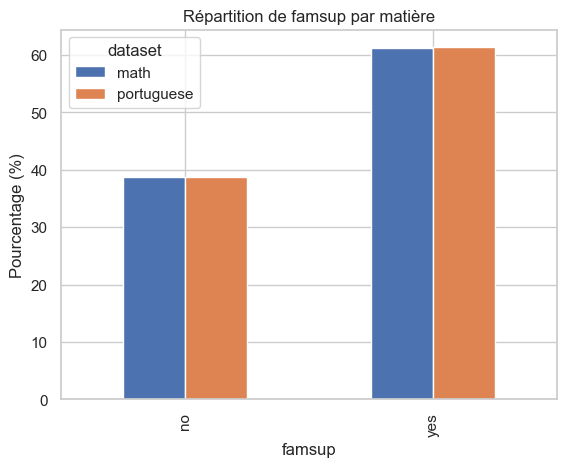

In [8]:
# ============================================================
# 6. Comparaison de quelques variables sociales
# ============================================================

def compare_categorical(col):
    ct = pd.crosstab(data[col], data["dataset"], normalize="columns") * 100
    print(f"\n=== Répartition (%) de {col} par matière ===")
    print(ct)

    ct.plot(kind="bar")
    plt.title(f"Répartition de {col} par matière")
    plt.ylabel("Pourcentage (%)")
    plt.show()

for col in ["sex", "higher", "internet", "activities", "schoolsup", "famsup"]:
    if col in data.columns:
        compare_categorical(col)
